# Importing Data

In [1]:
from th_utilities import *

In [4]:
data = pd.read_csv("data.csv")
data.head()

Name  Value
0   micrograph500     60
1   micrograph316    120
2   micrograph188    100
3   micrograph795    165
4  micrograph1397    138

In [5]:
tensor2d = data_generator(data)
tensor3d = data_generator3D(data)

Shape of 2D Data Generated:  (194, 448, 448)
Shape of 3D Data Generated:  (194, 448, 448, 3)


In [6]:
X = size_reduction(tensor2d)
Y = np.array(data['Value']).reshape(194,1)
print(X.shape)
print(Y.shape)

(194, 100, 100)
(194, 1)


# Model Creation and Training

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import math

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

In [5]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        
        
        self.fc1 = nn.Linear(in_features=64*8*8, out_features=32)
        self.out = nn.Linear(in_features=32, out_features=1)
        
    def forward(self, t):
        
        # Hidden Conv Layer 1
        t = self.conv1(t)
        t = F.leaky_relu(t)
        t = F.max_pool2d(t, kernel_size=  5, stride=2)
        
        # Hidden Conv Layer 2
        t = self.conv2(t)
        t = F.leaky_relu(t)
        t = F.max_pool2d(t, kernel_size = 5, stride=2)
        
        # Hidden Conv Layer 3
        t = self.conv3(t)
        t = F.leaky_relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride=2)
                
        # FC Layer
        t = t.reshape(-1,64*8*8)
        t = self.fc1(t)
        
        # Out Layer
        t = self.out(t)
        
        return t

In [7]:
network = Network()
network(torch.randn(1,1,100,100)).shape

torch.Size([1, 1])

In [27]:
network = Network()
optimizer = optim.Adam(network.parameters(), lr=0.01)
Xt = torch.Tensor(X)
Yt = torch.Tensor(Y)

for epoch in range(5):

    total_loss = 0

    for i in range(len(Xt)):

        preds = network(Xt[i].reshape(1,1,100,100))
        loss = F.mse_loss(preds, Yt[i])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print("Epoch: ", epoch, "loss: ", total_loss/194)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  del sys.path[0]


Epoch:  0 loss:  136490.06640453456
Epoch:  1 loss:  2627.5141447745646
Epoch:  2 loss:  2717.433332528957
Epoch:  3 loss:  2641.6764905692953
Epoch:  4 loss:  2586.852570205159


In [49]:
optimizer = optim.Adam(network.parameters(), lr=0.0001)

for epoch in range(20):

    total_loss = 0

    for i in range(len(Xt)):

        preds = network(Xt[i].reshape(1,1,100,100))
        loss = F.mse_loss(preds, Yt[i])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print("Epoch: ", epoch, "loss: ", total_loss/194)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  # Remove the CWD from sys.path while we load stuff.


Epoch:  0 loss:  903.310864500183
Epoch:  1 loss:  839.9360186658072
Epoch:  2 loss:  832.3102505230969
Epoch:  3 loss:  794.2812417481459
Epoch:  4 loss:  792.3507528227967
Epoch:  5 loss:  751.5872285484322
Epoch:  6 loss:  732.097429847124
Epoch:  7 loss:  685.02689621906
Epoch:  8 loss:  671.2808384602295
Epoch:  9 loss:  625.3066580882776
Epoch:  10 loss:  603.1987026763477
Epoch:  11 loss:  590.9503665017301
Epoch:  12 loss:  557.4736373578535
Epoch:  13 loss:  540.5036348502284
Epoch:  14 loss:  498.7924576679763
Epoch:  15 loss:  480.45794612698296
Epoch:  16 loss:  516.926642519429
Epoch:  17 loss:  442.68117944708064
Epoch:  18 loss:  406.17420592192997
Epoch:  19 loss:  425.66031489211986


# Testing and Predictions

In [51]:
print(network(Xt[144].reshape(1,1,100,100)))
print(Yt[144])

tensor([[139.6072]], grad_fn=<AddmmBackward>)
tensor([170.])


tensor([[139.6072]], grad_fn=<AddmmBackward>)
tensor([170.])


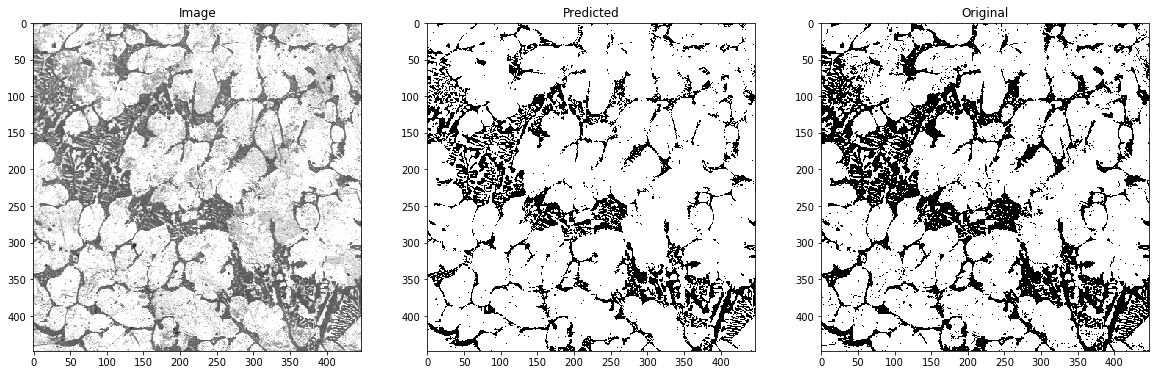

In [11]:
def plotter(i):
    print(network(Xt[i].reshape(1,1,100,100)))
    print(Yt[i])
    fig=plt.figure(figsize=(20, 20))
    columns = 3
    rows = 1
    image = [tensor2d[i], thresholding_func(tensor2d[i], network(Xt[i].reshape(1,1,100,100))),
             thresholding_func(tensor2d[i], Y[i])]
    title = ['Image', 'Predicted', 'Original']
    for i in range(1, columns*rows +1):
        #img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i)
        plt.title(title[i-1])
        plt.imshow(image[i-1], cmap='gray')
    plt.show()

plotter(144)

tensor([[149.3444]], grad_fn=<AddmmBackward>)
tensor([140.])


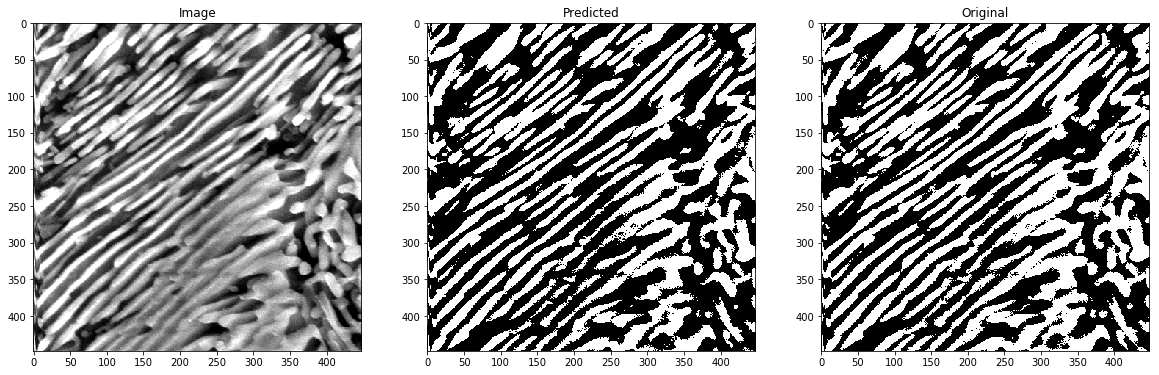

In [53]:
plotter(24)

tensor([[84.2717]], grad_fn=<AddmmBackward>)
tensor([90.])


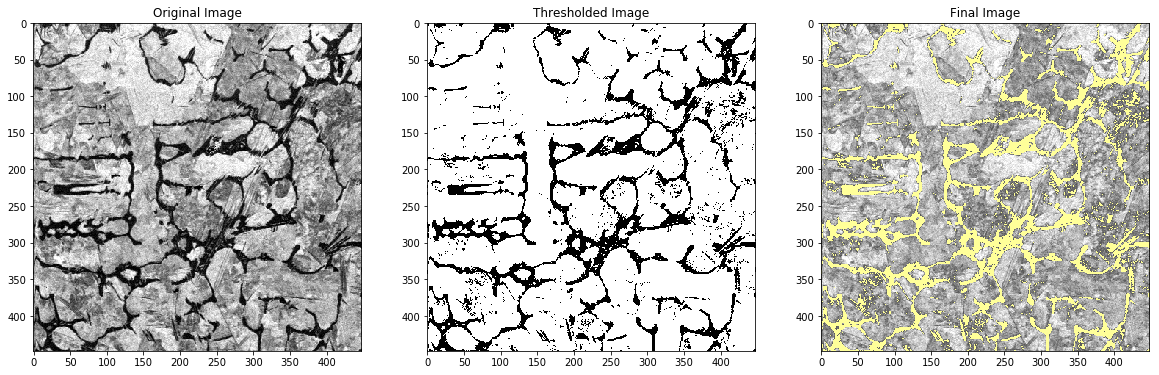

In [10]:
def color_plot(i,color=[255,255,153]):
    orig_img = tensor3d[i]
    gray_img = tensor2d[i]
    #print(orig_img.shape)
    #print(gray_img.shape)
    pred = network(Xt[i].reshape((1,1,100,100)))
    print(pred)
    print(Yt[i])
    pred_img = thresholding_func(gray_img, pred)
    #print(pred_img.shape)
    final_img = orig_img.copy()
    for i in range(448):
        for j in range(448):
            if pred_img[i,j] == 0:
                final_img[i,j,:] = np.array(color)
    fig=plt.figure(figsize=(20, 20))
    columns = 3
    rows = 1
    image = [orig_img, pred_img, final_img]
    title = ['Original Image', 'Thresholded Image', 'Final Image']
    for i in range(1, columns*rows +1):
        #img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i)
        plt.title(title[i-1])
        plt.imshow(np.array(image[i-1],np.int32), cmap='gray')
    plt.show()
    
color_plot(14)

tensor([[130.3731]], grad_fn=<AddmmBackward>)
tensor([150.])


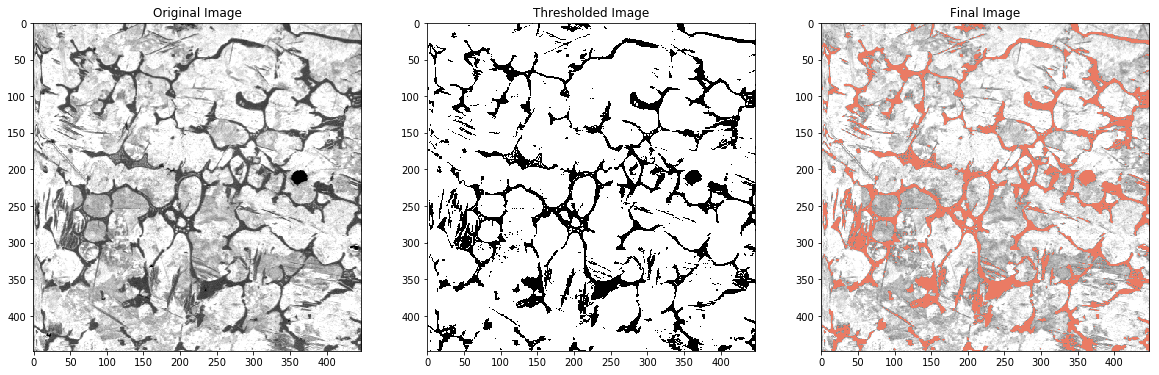

In [55]:
color_plot(150, [234,123,100])

tensor([[130.3731]], grad_fn=<AddmmBackward>)
tensor([150.])


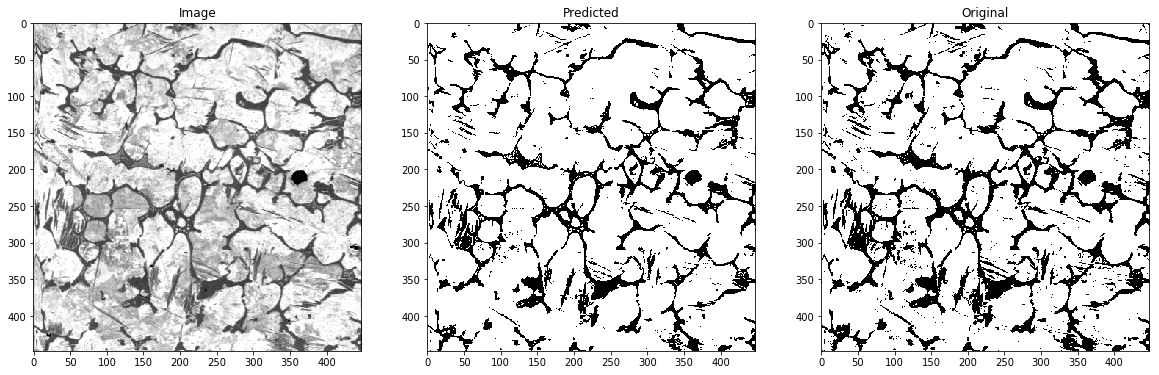

In [56]:
plotter(150)

tensor([[105.6185]], grad_fn=<AddmmBackward>)
tensor([100.])


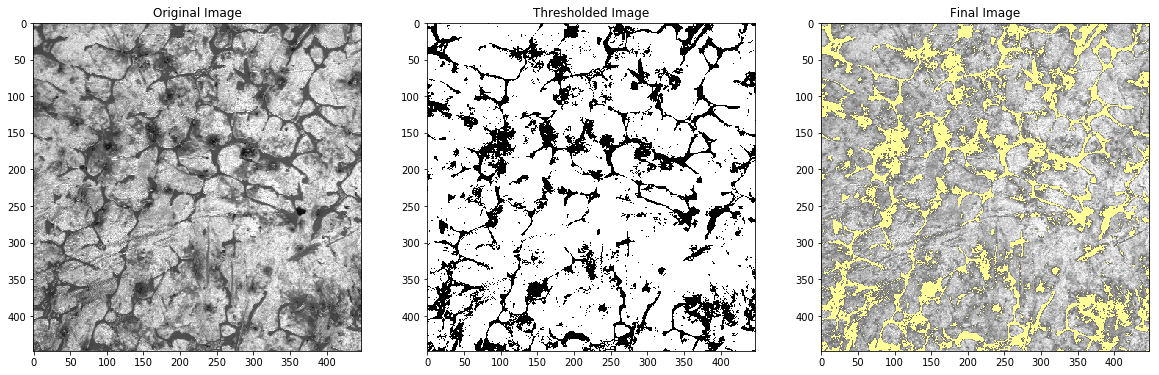

In [57]:
color_plot(10)

tensor([[134.4231]], grad_fn=<AddmmBackward>)
tensor([128.])


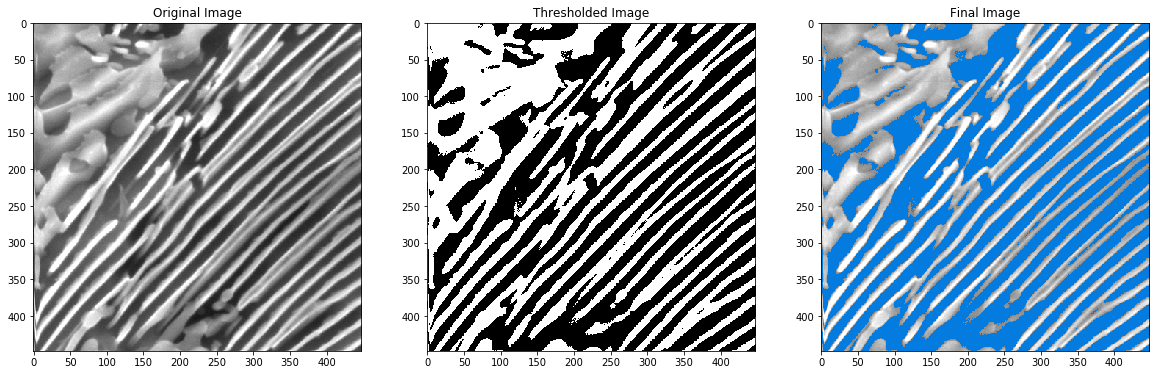

In [67]:
color_plot(184, [3,123,223])

tensor([[144.4555]], grad_fn=<AddmmBackward>)
tensor([150.])


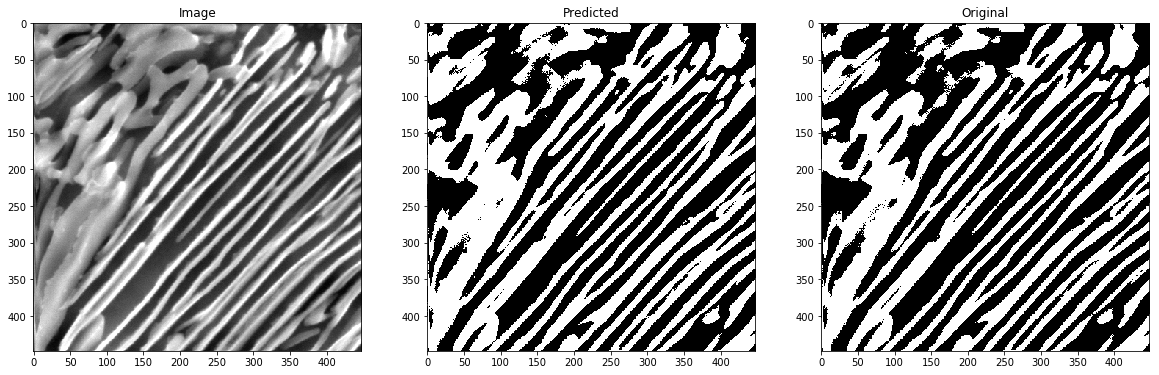

In [68]:
plotter(128)

# Saving the Model

In [69]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in network.state_dict():
    print(param_tensor, "\t", network.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([16, 1, 5, 5])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([32, 16, 5, 5])
conv2.bias 	 torch.Size([32])
conv3.weight 	 torch.Size([64, 32, 3, 3])
conv3.bias 	 torch.Size([64])
fc1.weight 	 torch.Size([32, 4096])
fc1.bias 	 torch.Size([32])
out.weight 	 torch.Size([1, 32])
out.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {759679577472: {'step': 3880, 'exp_avg': tensor([[[[ 1.5218e+01, -3.5944e+00, -7.0145e+00, -8.6111e+00, -1.4078e+01],
          [ 5.7120e+00, -4.3295e+00, -4.5655e+00, -3.3642e+00, -6.3593e+00],
          [-6.1371e+00, -8.0143e+00, -5.5281e+00,  6.0543e-01,  3.5324e+00],
          [-7.2472e+00, -9.9163e+00, -9.7590e+00, -1.9510e+00,  3.1834e+00],
          [-3.6530e+00, -4.5518e+00, -1.3859e+01, -1.5129e+01, -5.2203e+00]]],


        [[[ 1.4121e+03,  1.0238e+03,  1.0593e+03,  1.3701e+03,  1.0029e+03],
          [ 1.3164e+03,  1.1589e+03,  1.2053e+03,  1.2372e+03,  1.1915e+03],
          [ 8.8711e+02,  

         1.3499e+07, 2.1762e+07, 1.2321e+09, 1.3158e+07, 2.4645e+08]])}, 759679578048: {'step': 3880, 'exp_avg': tensor([-4.1672]), 'exp_avg_sq': tensor([2018.8571])}}
param_groups 	 [{'lr': 0.0001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [759679577472, 759679577544, 759679577400, 759679577616, 759679577688, 759679577760, 759679577832, 759679577904, 759679577976, 759679578048]}]


In [70]:
torch.save(network.state_dict(), 'Pytorch_model.h5')

In [71]:
the_model = Network()
the_model.load_state_dict(torch.load('Pytorch_model.h5'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [73]:
the_model(Xt[9].reshape((1,1,100,100)))

tensor([[94.9859]], grad_fn=<AddmmBackward>)

In [74]:
network(Xt[9].reshape((1,1,100,100)))

tensor([[94.9859]], grad_fn=<AddmmBackward>)

# More Testing

In [7]:
Xt = torch.Tensor(X)
Yt = torch.Tensor(Y)

In [6]:
network = Network()
network.load_state_dict(torch.load('Pytorch_model.h5'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [9]:
network(Xt[9].reshape((1,1,100,100)))

tensor([[94.9859]], grad_fn=<AddmmBackward>)

tensor([[111.9539]], grad_fn=<AddmmBackward>)
tensor([140.])


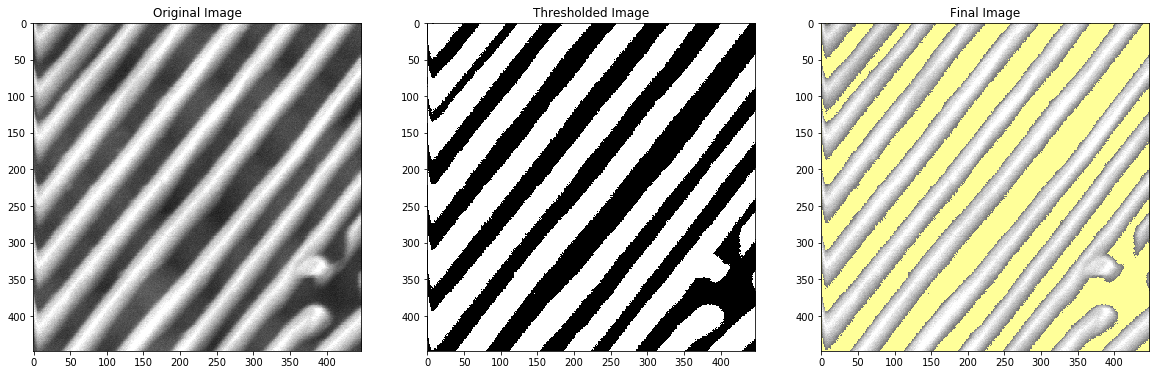

In [12]:
color_plot(98)

tensor([[94.9859]], grad_fn=<AddmmBackward>)
tensor([110.])


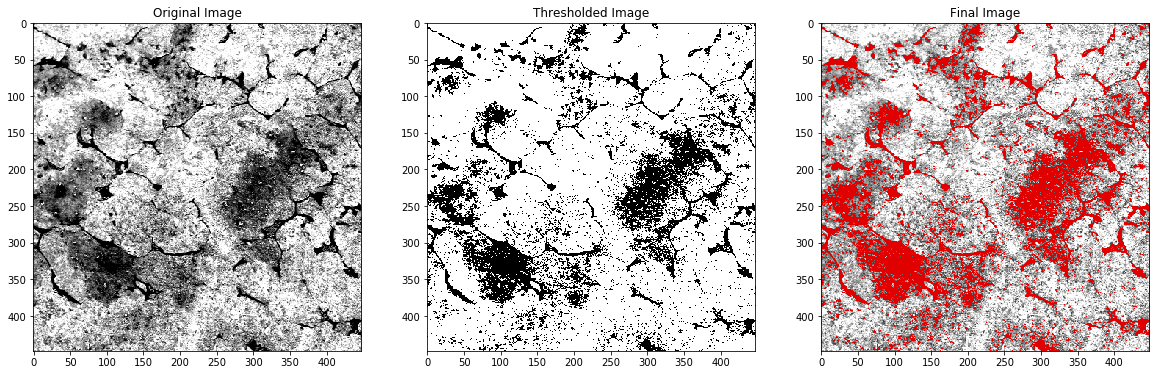

In [16]:
color_plot(9, [225,0,0])

tensor([[148.5346]], grad_fn=<AddmmBackward>)
tensor([146.])


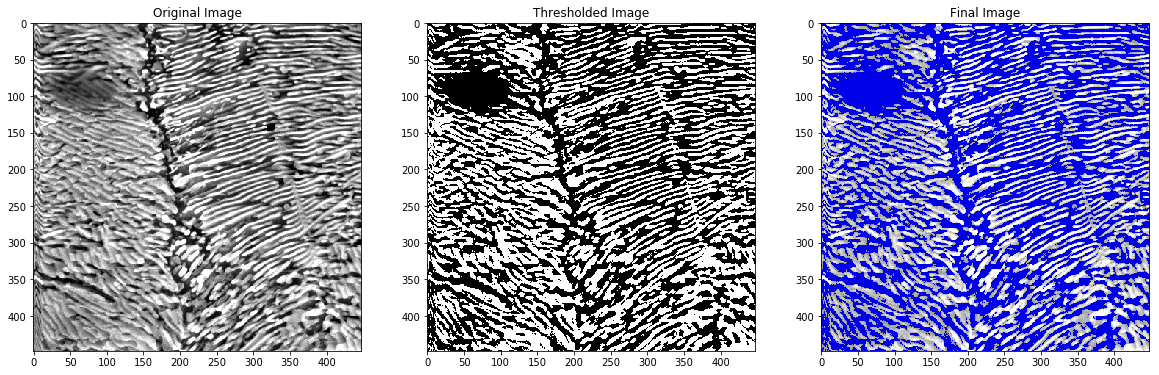

In [15]:
color_plot(8, [0,0,234])

tensor([[57.0081]], grad_fn=<AddmmBackward>)
tensor([60.])


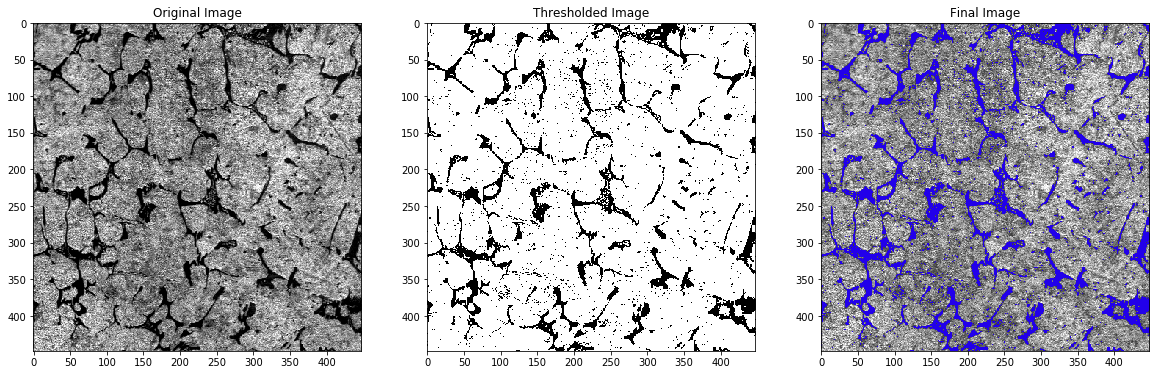

In [21]:
color_plot(88, [34,0,234])

tensor([[98.0858]], grad_fn=<AddmmBackward>)
tensor([160.])


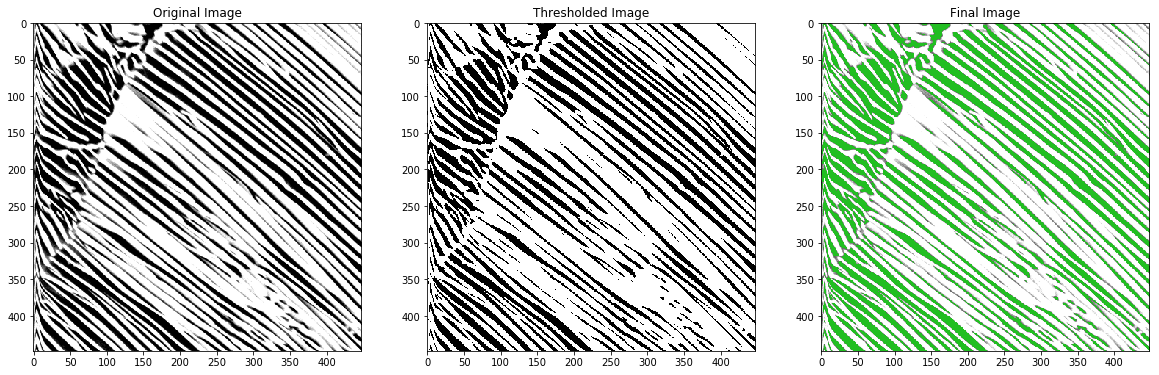

In [23]:
color_plot(68, [34,190,34])

tensor([[140.6360]], grad_fn=<AddmmBackward>)
tensor([150.])


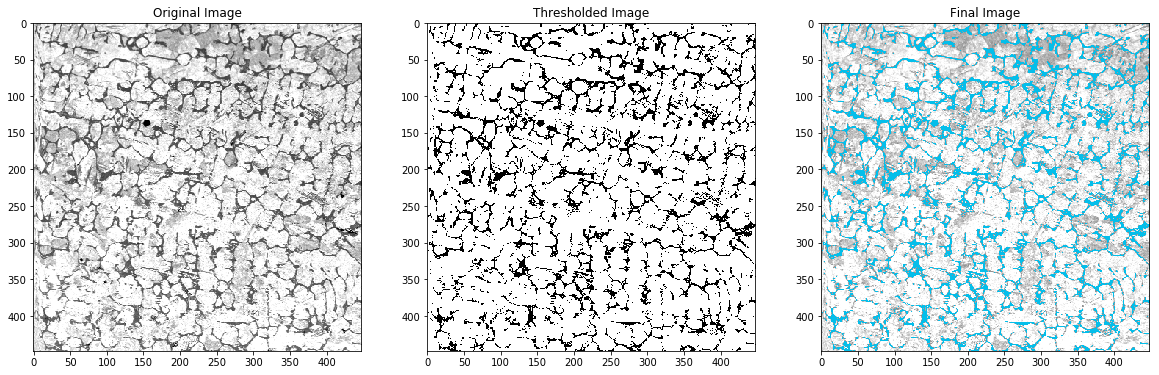

In [25]:
color_plot(152, [4,190,234])